# Countries Data Analysis

This notebook extracts the countries from the dataset and relates to the total count of trials based on the status.  Here we can see a visual representation of the percentage of trials conducted separted by country in each part of the world

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from dateutil.parser import parse
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import unicodedata
import geopandas

from matplotlib import pyplot as plt

In [2]:
cancer_df= pd.read_pickle('Data/cancer_data_cleaned.pkl')

In [3]:
cardiovascular_df= pd.read_pickle('Data/cardiovascular_data_cleaned.pkl')

In [4]:
respiratory_df= pd.read_pickle('Data/respiratory_data_cleaned.pkl')

In [5]:
data = pd.concat([cancer_df,cardiovascular_df, respiratory_df ])

In [6]:
countries_df = data[['Countries','Status']].copy()


def countries(data):
    for i in data['Countries'] :
        i = i.strip()
    return i

countries_df['Countries']= countries_df.apply(countries, axis=1)

c_df= (countries_df.set_index('Status')['Countries'].explode().rename('Country').groupby(level=0).value_counts().reset_index(name='count'))

In [7]:
c_df['Country'] = np.where(
    c_df['Country'] == 'United States', 
    'United States of America', 
    c_df['Country'])

In [8]:
# Descriptive Statistics based on Country and Status
total_trials = sum(c_df['count'])
c_df['total_trials_by_country'] = c_df.groupby(['Country'])['count'].transform('sum')
c_df['total_trials_by_status'] = c_df.groupby(['Status'])['count'].transform('sum')
c_df['Status_Trials_Per_Country'] = (c_df['count'].div(c_df['total_trials_by_country']).round(2))*100
c_df['Status_Total_Trials'] = (c_df['count'].div(total_trials).round(2))*100
c_df['Status_Trials_Per_Status'] = (c_df['count'].div(c_df['total_trials_by_status']).round(2))*100

In [9]:
# Filter by country to check calculations
c_df[c_df["Country"].str.contains("France")]

,Status,Country,count,total_trials_by_country,total_trials_by_status,Status_Trials_Per_Country,Status_Total_Trials,Status_Trials_Per_Status
1,0,France,200,1222,3470,16.0,1.0,6.0
66,1,France,1022,1222,21150,84.0,4.0,5.0


In [10]:
# split dataframe based on Status
c_df_terminated = c_df[c_df.Status == 0]
c_df_completed = c_df[c_df.Status == 1]

In [11]:
c_df_completed.tail(60)

,Status,Country,count,total_trials_by_country,total_trials_by_status,Status_Trials_Per_Country,Status_Total_Trials,Status_Trials_Per_Status
123,1,Serbia,12,13,21150,92.0,0.0,0.0
124,1,Bulgaria,11,12,21150,92.0,0.0,0.0
125,1,Kenya,11,11,21150,100.0,0.0,0.0
126,1,Lithuania,11,11,21150,100.0,0.0,0.0
127,1,Jordan,10,11,21150,91.0,0.0,0.0
128,1,Croatia,9,9,21150,100.0,0.0,0.0
129,1,Kazakhstan,9,9,21150,100.0,0.0,0.0
130,1,Qatar,7,7,21150,100.0,0.0,0.0
131,1,Uganda,7,8,21150,88.0,0.0,0.0
132,1,Ghana,6,6,21150,100.0,0.0,0.0


In [17]:
c_df_terminated.tail(40)

,Status,Country,count,total_trials_by_country,total_trials_by_status,Status_Trials_Per_Country,Status_Total_Trials,Status_Trials_Per_Status
24,0,Hong Kong,10,60,3470,17.0,0.0,0.0
25,0,New Zealand,10,87,3470,11.0,0.0,0.0
26,0,Singapore,9,80,3470,11.0,0.0,0.0
27,0,Russian Federation,7,162,3470,4.0,0.0,0.0
28,0,Czechia,6,42,3470,14.0,0.0,0.0
29,0,Ireland,6,48,3470,12.0,0.0,0.0
30,0,Poland,6,116,3470,5.0,0.0,0.0
31,0,Mexico,5,59,3470,8.0,0.0,0.0
32,0,Saudi Arabia,4,30,3470,13.0,0.0,0.0
33,0,South Africa,4,46,3470,9.0,0.0,0.0


In [18]:
# Decide on outliers
c_df_terminated['Cumulative Count (Trials)'] = c_df_terminated['count'].cumsum()
c_df_completed['Cumulative Count (Trials)'] = c_df_completed['count'].cumsum()

/var/folders/s2/5gbl3g1j1lg0rrwnkbx4vyj80000gn/T/ipykernel_5648/627674174.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df_terminated['Cumulative Count (Trials)'] = c_df_terminated['count'].cumsum()
/var/folders/s2/5gbl3g1j1lg0rrwnkbx4vyj80000gn/T/ipykernel_5648/627674174.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df_completed['Cumulative Count (Trials)'] = c_df_completed['count'].cumsum()


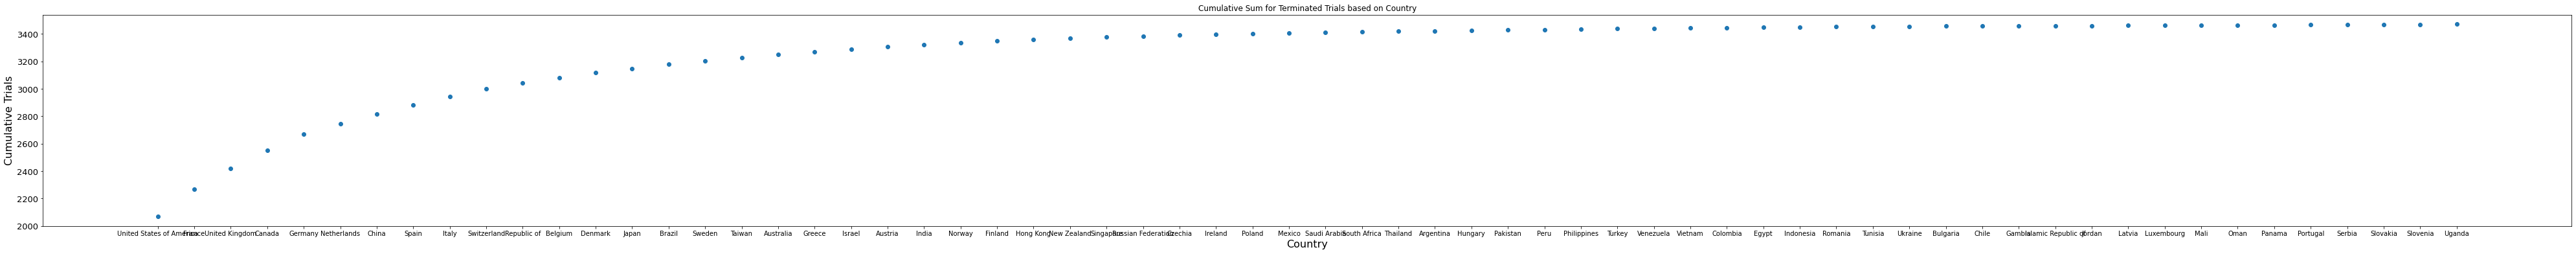

In [23]:
plt.figure(figsize=(70,6))

plt.scatter(c_df_terminated['Country'], c_df_terminated['Cumulative Count (Trials)'])

plt.xlabel("Country", fontsize=16)
plt.ylabel("Cumulative Trials", fontsize=16)

plt.yticks(fontsize=13)
plt.title('Cumulative Sum for Terminated Trials based on Country')

plt.show()

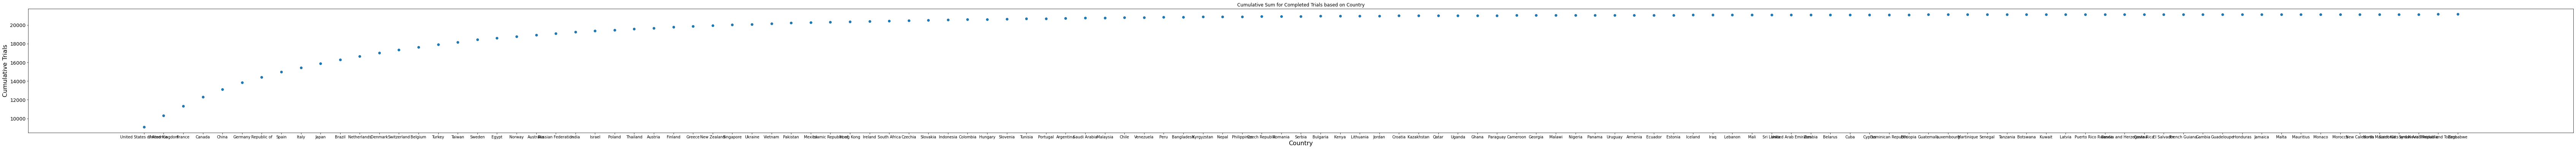

In [28]:
plt.figure(figsize=(120,6))

plt.scatter(c_df_completed['Country'], c_df_completed['Cumulative Count (Trials)'])

plt.xlabel("Country", fontsize=16)
plt.ylabel("Cumulative Trials", fontsize=16)
plt.title('Cumulative Sum for Completed Trials based on Country')

plt.yticks(fontsize=13)

plt.show()

In [29]:
# Drop countries that have less than or equal to 6 trials total
df_terminated = c_df_terminated[c_df_terminated['count'] > 6]

# Drop countries that have less than or equal to 21 trials total
df_completed = c_df_completed[c_df_completed['count'] > 21]

In [30]:
df_terminated

,Status,Country,count,total_trials_by_country,total_trials_by_status,Status_Trials_Per_Country,Status_Total_Trials,Status_Trials_Per_Status,Cumulative Count (Trials)
0,0,United States of America,2070,11158,3470,19.0,8.0,60.0,2070
1,0,France,200,1222,3470,16.0,1.0,6.0,2270
2,0,United Kingdom,148,1349,3470,11.0,1.0,4.0,2418
3,0,Canada,135,1115,3470,12.0,1.0,4.0,2553
4,0,Germany,116,831,3470,14.0,0.0,3.0,2669
5,0,Netherlands,78,457,3470,17.0,0.0,2.0,2747
6,0,China,70,900,3470,8.0,0.0,2.0,2817
7,0,Spain,67,618,3470,11.0,0.0,2.0,2884
8,0,Italy,60,521,3470,12.0,0.0,2.0,2944
9,0,Switzerland,56,386,3470,15.0,0.0,2.0,3000


In [31]:
df_completed

,Status,Country,count,total_trials_by_country,total_trials_by_status,Status_Trials_Per_Country,Status_Total_Trials,Status_Trials_Per_Status,Cumulative Count (Trials)
64,1,United States of America,9088,11158,21150,81.0,37.0,43.0,9088
65,1,United Kingdom,1201,1349,21150,89.0,5.0,6.0,10289
66,1,France,1022,1222,21150,84.0,4.0,5.0,11311
67,1,Canada,980,1115,21150,88.0,4.0,5.0,12291
68,1,China,830,900,21150,92.0,3.0,4.0,13121
69,1,Germany,715,831,21150,86.0,3.0,3.0,13836
70,1,Republic of,579,623,21150,93.0,2.0,3.0,14415
71,1,Spain,551,618,21150,89.0,2.0,3.0,14966
72,1,Italy,461,521,21150,88.0,2.0,2.0,15427
73,1,Japan,449,481,21150,93.0,2.0,2.0,15876


In [32]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# Merge the two DataFrames together
table = world.merge(c_df.loc[c_df['Status'] == 1], how="left", left_on=['name'], right_on=['Country'])
table_terminated = world.merge(df_terminated.loc[df_terminated['Status'] == 0], how="left", left_on=['name'], right_on=['Country'])
table_completed = world.merge(df_completed.loc[df_completed['Status'] == 1], how="left", left_on=['name'], right_on=['Country'])

In [33]:
table.head(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Status,Country,count,total_trials_by_country,total_trials_by_status,Status_Trials_Per_Country,Status_Total_Trials,Status_Trials_Per_Status
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",1.0,Tanzania,3.0,3.0,21150.0,100.0,0.0,0.0
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",1.0,Canada,980.0,1115.0,21150.0,88.0,4.0,5.0
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",1.0,United States of America,9088.0,11158.0,21150.0,81.0,37.0,43.0


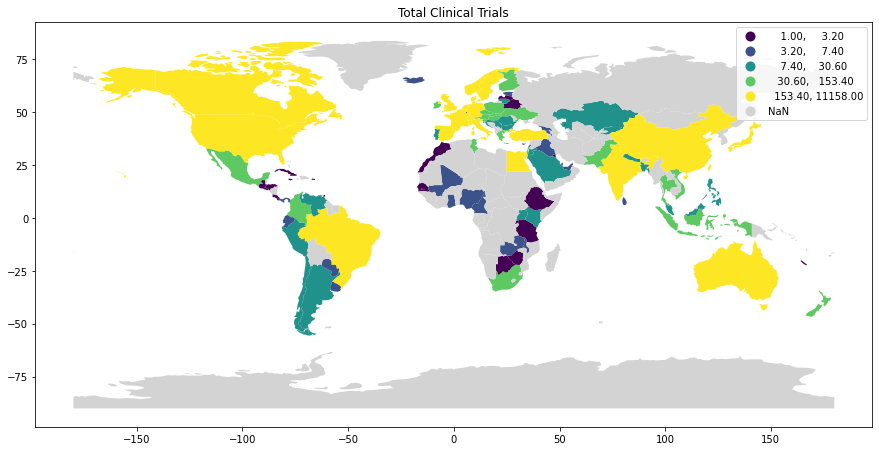

In [34]:
ax = table.plot(column='total_trials_by_country', scheme="quantiles",
           figsize=(15,15),
           legend=True,cmap='viridis',  missing_kwds= dict(color = "lightgrey",))

ax.set_title("Total Clinical Trials")

## save fig
plt.savefig("total_trials.png", dpi=200)

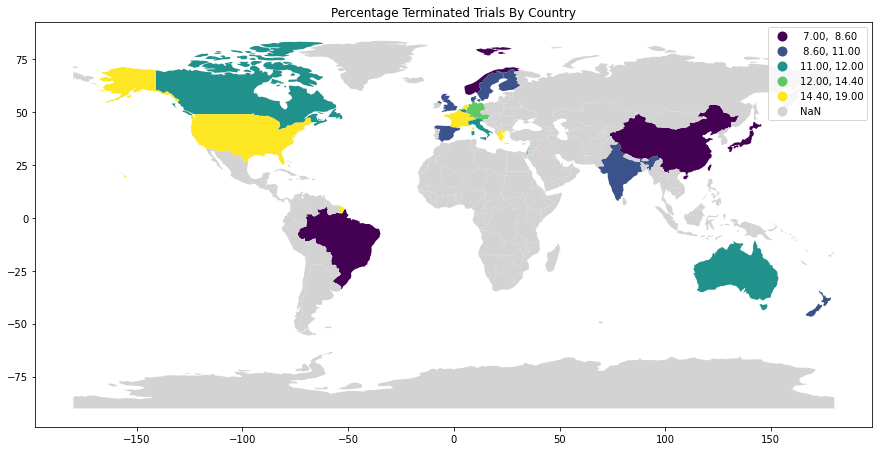

In [35]:
ax = table_terminated.plot(column='Status_Trials_Per_Country', scheme="quantiles",
           figsize=(15,15),
           legend=True,cmap='viridis',  missing_kwds= dict(color = "lightgrey",))

ax.set_title("Percentage Terminated Trials By Country")

## save fig
plt.savefig("percent_terminated_trials.png", dpi=200)

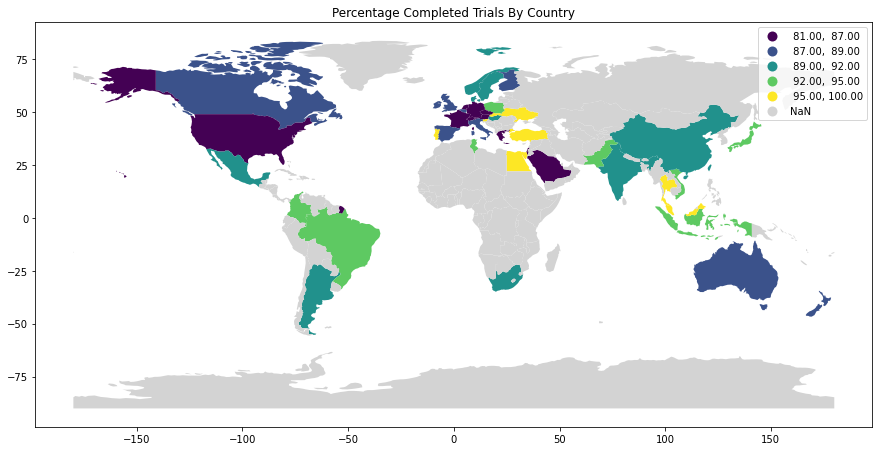

In [36]:
ax = table_completed.plot(column='Status_Trials_Per_Country', scheme="quantiles",
           figsize=(15,15),
           legend=True,cmap='viridis',  missing_kwds= dict(color = "lightgrey",))

ax.set_title("Percentage Completed Trials By Country")

## save fig
plt.savefig("percent_Completed_trials.png", dpi=200)